In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Membaca file dta
df = pd.read_stata("DM2021_fktpnonkapitasi.dta")

# Menampilkan data
print(df)


         PSTV01     PSTV02     PSTV15             PNK02      PNK03      PNK04  \
0      88204825   88204825   6.755007  203960321P000052 2021-03-13 2021-03-16   
1      24034617   72462276  12.832207  185630321P001651 2021-03-28 2021-03-28   
2      17391573  417758463  13.106908   46631021P000693 2021-10-11 2021-10-14   
3      60560444   60560444  12.762736  325900321P000146 2021-03-17 2021-03-21   
4     291346266  291346266  13.404066  460570621P000056 2021-06-13 2021-06-16   
...         ...        ...        ...               ...        ...        ...   
1697   59343053   59343053  11.434834  588090321P000034 2021-03-28 2021-03-28   
1698   38863777   90173658  12.978864  602620221P000038 2021-02-08 2021-02-08   
1699   38863777   90173658  12.978864  602620221P000014 2021-02-03 2021-02-03   
1700    6171431    6171431   2.498639   12751121P000329 2021-11-26 2021-11-26   
1701   72945328   72945328   5.127367  334741021P000920 2021-10-21 2021-10-21   

          PNK05            

## Data Cleaning

In [11]:
# Menghilangkan Baris Duplikat
df.drop_duplicates(inplace=True)

In [12]:
df = df.dropna(axis=0)

In [13]:
print(df)

        PSTV01    PSTV02     PSTV15             PNK02      PNK03      PNK04  \
5     81015840  81015840   6.769341  422320721P000720 2021-07-10 2021-07-10   
7     29370125  29370125  12.620406  340880321P002999 2021-03-25 2021-03-25   
8      7662814   7662814  12.128812  222771121P000527 2021-11-21 2021-11-21   
9     53019648  53019648  14.044061   75110521P000245 2021-05-19 2021-05-19   
10    49961851  78498608  13.067945  136460221P000198 2021-02-04 2021-02-04   
...        ...       ...        ...               ...        ...        ...   
1512  78166735   8635688  13.592475  409960821P000510 2021-08-30 2021-08-30   
1513  78166735   8635688  13.592475  409960721P000448 2021-07-31 2021-07-31   
1514  78166735   8635688  13.592475  409960321P000515 2021-03-25 2021-03-25   
1515  95310614  76869583  10.193729   31980821P005040 2021-08-19 2021-08-19   
1670  64617487  64617487   7.285743  334551221P000487 2021-12-13 2021-12-13   

          PNK05           PNK06            PNK07   

In [14]:
# Menghapus Baris atau Kolom dengan Nilai yang Hilang
df.dropna(axis=0)  # untuk menghapus baris
df.dropna(axis=1)  # untuk menghapus kolom

,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,PNK08,...,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18,PNK19,PNK20
5,81015840,81015840,6.769341,422320721P000720,2021-07-10,2021-07-10,2021-07-10,ACEH,ACEH BARAT DAYA,PEMERINTAH KABUPATEN/KOTA,...,PBI APBD,A09 Other gastroenteritis and colitis of infec...,A09,A09,Diarrhoea and gastroenteritis of presumed infe...,Evakuasi medis / Ambulans Darat,102000,102000,0.00,0.0
7,29370125,29370125,12.620406,340880321P002999,2021-03-25,2021-03-25,2021-03-25,ACEH,ACEH UTARA,PEMERINTAH KABUPATEN/KOTA,...,PPU,A75 Typhus fever,A75,A752,Typhus fever due to Rickettsia typhi,Evakuasi medis / Ambulans Darat,204000,204000,0.00,0.0
8,7662814,7662814,12.128812,222771121P000527,2021-11-21,2021-11-21,2021-11-21,SULAWESI BARAT,POLEWALI MANDAR,PEMERINTAH KABUPATEN/KOTA,...,PBI APBN,B17 Other acute viral hepatitis,B17,B179,"Acute viral hepatitis, unspecified",Evakuasi medis / Ambulans Darat,100000,100000,0.00,0.0
9,53019648,53019648,14.044061,75110521P000245,2021-05-19,2021-05-19,2021-05-19,JAWA BARAT,KOTA BANDUNG,SWASTA,...,BUKAN PEKERJA,E10 Type 1 diabetes mellitus,E10,E109,Insulin-dependent diabetes mellitus without co...,Kreatinin,30000,30000,1.45,0.0
10,49961851,78498608,13.067945,136460221P000198,2021-02-04,2021-02-04,2021-02-04,JAWA TIMUR,JEMBER,SWASTA,...,PPU,E10 Type 1 diabetes mellitus,E10,E109,Insulin-dependent diabetes mellitus without co...,Microalbuminaria,120000,120000,4032.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,78166735,8635688,13.592475,409960821P000510,2021-08-30,2021-08-30,2021-08-30,JAWA TIMUR,PACITAN,PEMERINTAH KABUPATEN/KOTA,...,PBI APBN,Z00 General examination and investigation of p...,Z00,Z00,General examination and investigation of perso...,Gula Darah Puasa (GDP) - PRB/Prolanis,10000,10000,98.00,0.0
1513,78166735,8635688,13.592475,409960721P000448,2021-07-31,2021-07-31,2021-07-31,JAWA TIMUR,PACITAN,PEMERINTAH KABUPATEN/KOTA,...,PBI APBN,Z00 General examination and investigation of p...,Z00,Z00,General examination and investigation of perso...,Gula Darah Puasa (GDP) - PRB/Prolanis,10000,10000,98.00,0.0
1514,78166735,8635688,13.592475,409960321P000515,2021-03-25,2021-03-25,2021-03-25,JAWA TIMUR,PACITAN,PEMERINTAH KABUPATEN/KOTA,...,PBI APBN,Z00 General examination and investigation of p...,Z00,Z00,General examination and investigation of perso...,Gula Darah Puasa (GDP) - PRB/Prolanis,10000,10000,98.00,0.0
1515,95310614,76869583,10.193729,31980821P005040,2021-08-19,2021-08-19,2021-08-19,JAWA TIMUR,KOTA MALANG,SWASTA,...,BUKAN PEKERJA,Z00 General examination and investigation of p...,Z00,Z00,General examination and investigation of perso...,Gula Darah Puasa (GDP) - PRB/Prolanis,17500,17500,129.00,0.0


In [15]:
# Menyaring data hanya untuk tahun 2021
dataframe_2020 = df[df['PNK05'] == 2021]

# Menampilkan isi dataframe setelah penyaringan
print(dataframe_2020)

Empty DataFrame
Columns: [PSTV01, PSTV02, PSTV15, PNK02, PNK03, PNK04, PNK05, PNK06, PNK07, PNK08, PNK09, PNK10, PNK11, PNK12, PNK13, PNK13A, PNK14, PNK15, PNK16, PNK17, PNK18, PNK19, PNK20]
Index: []

[0 rows x 23 columns]


In [16]:
# Menghapus baris dengan tahun 2015 sampai 2019
tahun_tidak_ingin = [2015, 2016, 2017, 2018, 2019, 2020]
dataframe = df[~df['PNK05'].isin(tahun_tidak_ingin)]

# Menampilkan isi dataframe setelah penghapusan
print(dataframe)

        PSTV01    PSTV02     PSTV15             PNK02      PNK03      PNK04  \
5     81015840  81015840   6.769341  422320721P000720 2021-07-10 2021-07-10   
7     29370125  29370125  12.620406  340880321P002999 2021-03-25 2021-03-25   
8      7662814   7662814  12.128812  222771121P000527 2021-11-21 2021-11-21   
9     53019648  53019648  14.044061   75110521P000245 2021-05-19 2021-05-19   
10    49961851  78498608  13.067945  136460221P000198 2021-02-04 2021-02-04   
...        ...       ...        ...               ...        ...        ...   
1512  78166735   8635688  13.592475  409960821P000510 2021-08-30 2021-08-30   
1513  78166735   8635688  13.592475  409960721P000448 2021-07-31 2021-07-31   
1514  78166735   8635688  13.592475  409960321P000515 2021-03-25 2021-03-25   
1515  95310614  76869583  10.193729   31980821P005040 2021-08-19 2021-08-19   
1670  64617487  64617487   7.285743  334551221P000487 2021-12-13 2021-12-13   

          PNK05           PNK06            PNK07   

In [31]:
# Mengubah kolom PNK03, PNK04, dan PNK05 menjadi tipe data datetime
dataframe['PNK03'] = pd.to_datetime(dataframe['PNK03'], errors='coerce')
dataframe['PNK04'] = pd.to_datetime(dataframe['PNK04'], errors='coerce')
dataframe['PNK05'] = pd.to_datetime(dataframe['PNK05'], errors='coerce')

# Menyaring data hanya untuk tahun 2021
dataframe_2021 = dataframe[dataframe['PNK03'].dt.year == 2021]
dataframe_2021 = dataframe[dataframe['PNK04'].dt.year == 2021]
dataframe_2021 = dataframe[dataframe['PNK05'].dt.year == 2021]

# Menampilkan isi dataframe setelah penyaringan
print(dataframe_2021)

        PSTV01    PSTV02     PSTV15             PNK02      PNK03      PNK04  \
5     81015840  81015840   6.769341  422320721P000720 2021-07-10 2021-07-10   
7     29370125  29370125  12.620406  340880321P002999 2021-03-25 2021-03-25   
8      7662814   7662814  12.128812  222771121P000527 2021-11-21 2021-11-21   
9     53019648  53019648  14.044061   75110521P000245 2021-05-19 2021-05-19   
10    49961851  78498608  13.067945  136460221P000198 2021-02-04 2021-02-04   
...        ...       ...        ...               ...        ...        ...   
1512  78166735   8635688  13.592475  409960821P000510 2021-08-30 2021-08-30   
1513  78166735   8635688  13.592475  409960721P000448 2021-07-31 2021-07-31   
1514  78166735   8635688  13.592475  409960321P000515 2021-03-25 2021-03-25   
1515  95310614  76869583  10.193729   31980821P005040 2021-08-19 2021-08-19   
1670  64617487  64617487   7.285743  334551221P000487 2021-12-13 2021-12-13   

          PNK05           PNK06            PNK07   

In [9]:
for column in dataframe_2021.columns:
    if dataframe_2021[column].dtype == "int64":
        dataframe_2021[column] = dataframe_2021[column].astype(str).str.replace(",", "").str.format("{:,}")
dataframe_2021.to_csv("DM2021_fktpnonkapitasi.csv", decimal=".")

## Data Construction

In [49]:
df= df[['PSTV15', 'PNK18']]

In [50]:
df['PSTV15'].idxmax()

821

In [51]:
df.iloc[814]

PSTV15       14.071786
PNK18     20000.000000
Name: 821, dtype: float64

## Labelly Data

In [52]:
X = df[['PSTV15']]
y = df['PNK18']
m = len(y)

## Modelling

In [32]:
# Baca data 
data = pd.read_csv('DM2021_fktpnonkapitasi.csv')
X = data[['PNK18', 'PSTV15']]

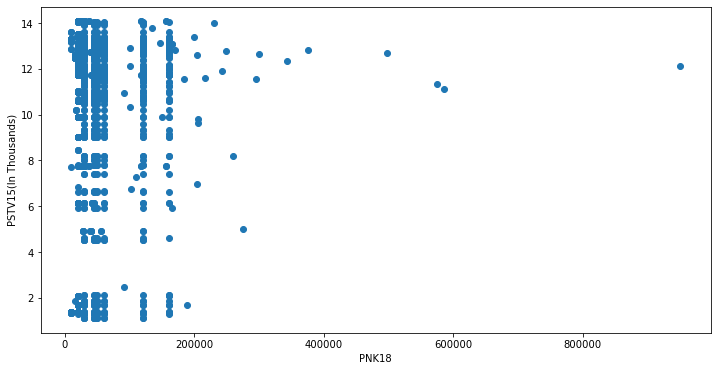

In [33]:
#Visualise data points
plt.figure(figsize=(12,6))
plt.scatter(X['PNK18'], X["PSTV15"])
plt.xlabel ('PNK18')
plt.ylabel('PSTV15(In Thousands)')
plt.show()

In [34]:
# Calculate silhouette scores for a range of k values
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["PNK18"]])
    clusters = kmeans.labels_
    silhouette_scores.append(silhouette_score(data[["PNK18"]], clusters))


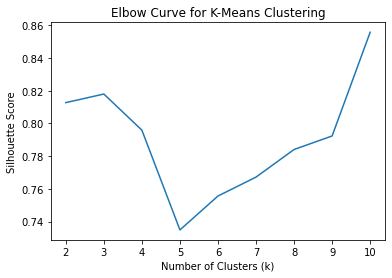

In [35]:
# Plot the elbow curve
plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for K-Means Clustering")
plt.show()

In [36]:
# Choose the optimal number of clusters (k)
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data[["PNK18"]])
clusters = kmeans.labels_

# Add cluster labels to the data
data["Cluster"] = clusters

# Mendapatkan kode PNK18 yang paling umum untuk setiap klaster
cluster_codes = []
for i in range(k):
    cluster_data = data[data["Cluster"] == i]
    # Gunakan `dropna()` untuk menghilangkan baris yang memiliki value NaN untuk atribut PNK18
    cluster_data = cluster_data.dropna(subset=["PNK18"])
    cluster_codes.append(cluster_data["PNK18"].value_counts().nlargest(10).index.tolist())

# Mencetak kode PNK18 yang paling umum untuk setiap klaster
for i, codes in enumerate(cluster_codes):
    print(f"Klaster {i + 1} PNK18 yang paling umum:", codes)


Klaster 1 PNK18 yang paling umum: [30000, 45000, 20000, 60000, 50000, 10000, 28000, 15000, 40000, 55000]
Klaster 2 PNK18 yang paling umum: [120000, 160000, 118000, 156000, 100000, 165000, 91000, 204000, 102000, 249400]
Klaster 3 PNK18 yang paling umum: [498000, 585000, 950000, 575000]


In [38]:
# Menampilkan centroid
centroids = kmeans.cluster_centers_
print("Posisi Centroid:")
print(centroids)

Posisi Centroid:
[[3.62459964e+04 1.04599777e+01]
 [1.41754292e+05 1.03154371e+01]
 [6.52000000e+05 1.18251875e+01]]


In [26]:
print(kmeans.inertia_)

689110013463.5686


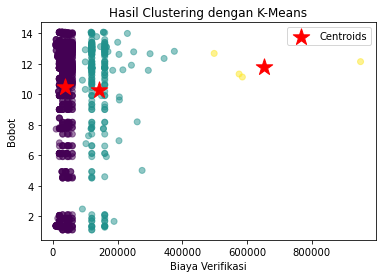

In [46]:
# Latih model KMeans pada data
kmeans.fit(features)

# Menambahkan label cluster ke data
data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering dan centroids
plt.scatter(data['PNK18'], data['PSTV15'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel('Biaya Verifikasi')
plt.ylabel('Bobot')
plt.title(f'Hasil Clustering dengan K-Means')
plt.legend()
plt.show()

## Evaluasi 

In [30]:
# Menghitung nilai Silhouette Coefficient
silhouette_avg = silhouette_score(features, kmeans.labels_)

# Konversi nilai SC ke dalam persen
silhouette_avg_percent = silhouette_avg * 100

print(f'Nilai Silhouette Coefficient: {silhouette_avg_percent:.2f}%')

Nilai Silhouette Coefficient: 81.79%


## Deployment

In [48]:
# Simpan model KMeans dan nilai Silhouette Coefficient ke dalam file
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('silhouette_coefficient.pkl', 'wb') as coef_file:
    pickle.dump(silhouette_avg_percent, coef_file)